#  Decision Tree Modeling

In [2]:
import pandas as pd

# Load dataset (skip metadata row)
df = pd.read_csv(
    "Example_WearableComputing_weight_lifting_exercises_biceps_curl_variations.csv",
    skiprows=1,
    na_values=["NaN", "NA", ""]
)

# Optional: Drop sparse columns (>95% missing) and fill NaNs
missing_percentage = df.isnull().mean() * 100
sparse_cols = missing_percentage[missing_percentage > 95].index
df.drop(columns=sparse_cols, inplace=True)
df.fillna(df.median(numeric_only=True), inplace=True)

print("Final shape:", df.shape)
print("Remaining missing values:", df.isnull().sum().sum())


Final shape: (4024, 59)
Remaining missing values: 0


### Feature and Target Selection

In [5]:
from sklearn.preprocessing import LabelEncoder

# Convert 'new_window' yes/no to 1/0
df['new_window'] = LabelEncoder().fit_transform(df['new_window'])


In [ ]:
# Define features 
X = df.drop(columns=[
    'classe', 'user_name', 
    'raw_timestamp_part_1', 'raw_timestamp_part_2', 
    'cvtd_timestamp', 'num_window'
])
y = df['classe']

### Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)

# Predict and Evaluate
y_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.915527950310559

Classification Report:
               precision    recall  f1-score   support

           A       0.95      0.91      0.93       273
           B       0.79      0.89      0.84       180
           C       0.50      0.09      0.15        23
           D       0.90      0.98      0.94        55
           E       0.99      0.99      0.99       274

    accuracy                           0.92       805
   macro avg       0.82      0.77      0.77       805
weighted avg       0.91      0.92      0.91       805


Confusion Matrix:
 [[248  24   0   1   0]
 [ 14 161   2   3   0]
 [  0  20   2   0   1]
 [  0   0   0  54   1]
 [  0   0   0   2 272]]


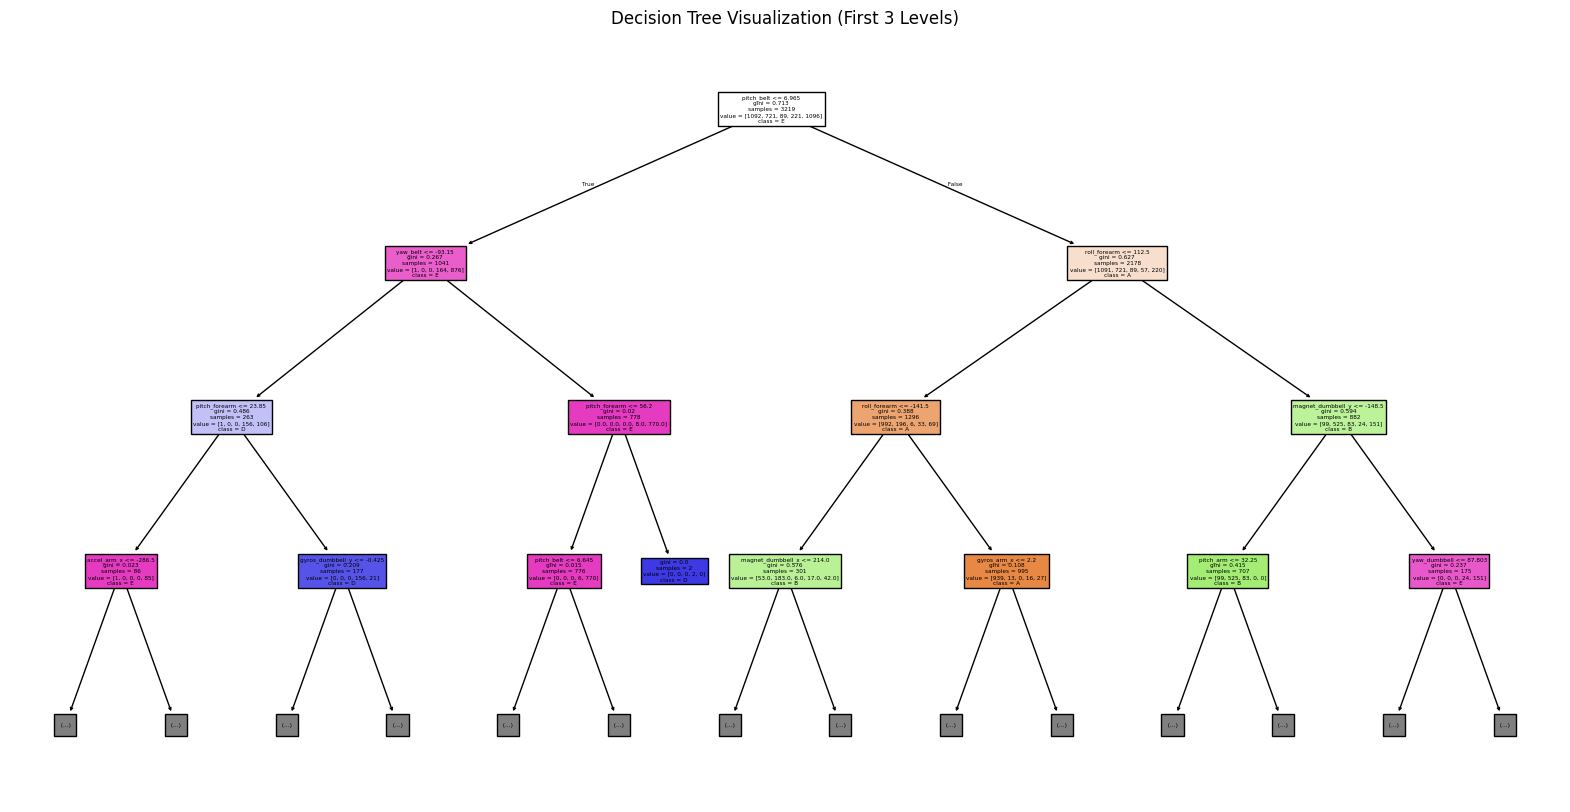

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=dt.classes_, filled=True, max_depth=3)
plt.title("Decision Tree Visualization (First 3 Levels)")
plt.show()
